In [5]:
import yaml

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [6]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [7]:
# Target dataset and model.
dataset = config['dataset']
model = config['model']
rnd_seed = config['rnd_seed']

# Load `metrics.csv` to pandas dataframe.
metrics_csv = f"training_logs/{dataset}/{model}_{rnd_seed}/lastest_run/metrics.csv"
df = pd.read_csv(metrics_csv)
df.head(5)

,epoch,epoch_time,step,test_accuracy,test_auc,train_accuracy,train_auc,train_loss,valid_accuracy,valid_auc,valid_loss_epoch,valid_loss_step
0,0.0,NaN,49,NaN,NaN,NaN,NaN,2.082434,NaN,NaN,NaN,NaN
1,0.0,NaN,99,NaN,NaN,NaN,NaN,1.760529,NaN,NaN,NaN,NaN
2,0.0,NaN,149,NaN,NaN,NaN,NaN,1.739409,NaN,NaN,NaN,NaN
3,0.0,NaN,199,NaN,NaN,NaN,NaN,1.454510,NaN,NaN,NaN,NaN
4,0.0,NaN,249,NaN,NaN,NaN,NaN,1.616476,NaN,NaN,NaN,NaN


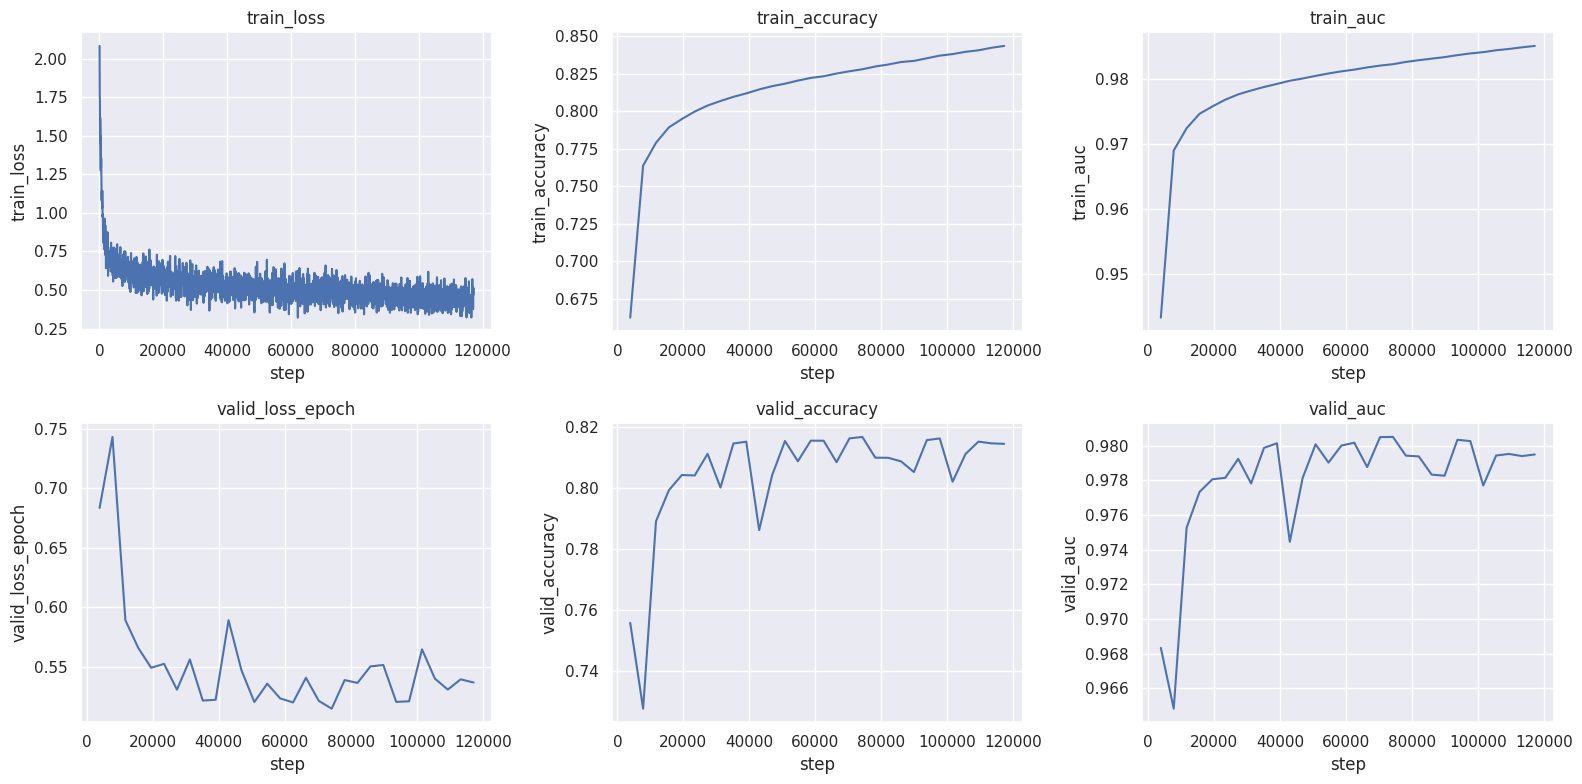

In [8]:
# Plot metrics.
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
metrics = ['train_loss', 'train_accuracy', 'train_auc', 'valid_loss_epoch', 'valid_accuracy', 'valid_auc']

for i, metric in enumerate(metrics):
    data = df[df[metric].notna()]
    plot = sns.lineplot(data=data, x='step', y=metric, ax=ax.flat[i])
    plot.set_title(metric)

plt.tight_layout()